<a href="https://colab.research.google.com/github/PRAN20/Cv-vs-Pil/blob/main/Spatial_Filtering_PIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Images**

In [1]:
!wget https://i.pinimg.com/564x/90/96/76/909676f235ab83668c709e58539763cf.jpg -O image1.png
!wget https://i.pinimg.com/564x/c7/e7/9e/c7e79ee3b52f388db2d0c826340112b8.jpg -O image2.png
!wget https://i.pinimg.com/564x/b1/7d/5b/b17d5bdecdbb4ed0f167922f5b545f8e.jpg -O image3.png

--2022-01-21 13:33:13--  https://i.pinimg.com/564x/90/96/76/909676f235ab83668c709e58539763cf.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.24.84, 2a04:4e42:6::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.24.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58749 (57K) [image/jpeg]
Saving to: ‘image1.png’

image1.png          100%[===================>]  57.37K  --.-KB/s    in 0.006s  

2022-01-21 13:33:13 (9.02 MB/s) - ‘image1.png’ saved [58749/58749]

--2022-01-21 13:33:13--  https://i.pinimg.com/564x/c7/e7/9e/c7e79ee3b52f388db2d0c826340112b8.jpg
Resolving i.pinimg.com (i.pinimg.com)... 151.101.24.84, 2a04:4e42:6::84
Connecting to i.pinimg.com (i.pinimg.com)|151.101.24.84|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 76280 (74K) [image/jpeg]
Saving to: ‘image2.png’

image2.png          100%[===================>]  74.49K  --.-KB/s    in 0.009s  

2022-01-21 13:33:13 (7.86 MB/s) - ‘image2.png’ saved [76280/76280]

--20

**Importing Header Files**

In [5]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import pandas as ps

**Declaring Function**

In [47]:
def conc_image (image1, image2, title_1 = "Original Image", title_2 = "New Image"):
  plt.figure(figsize=(10,10))
  plt.subplot(1,2,1)
  plt.title(title_1)
  plt.imshow(image1)

  plt.subplot(1,2,2)
  plt.title(title_2)
  plt.imshow(image2)
  plt.show()

# **Linear Filtering**

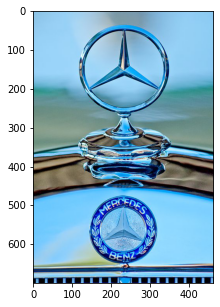

In [32]:
image = Image.open("image1.png")
plt.figure(figsize=(5,5))
plt.imshow(image)
plt.show()

In [41]:
rows, cols = image.size
Noise = np.random.normal(0, 15, (cols, rows, 3)).astype(np.uint8)

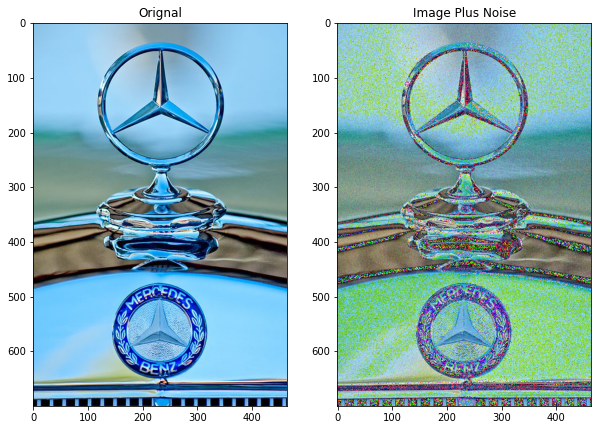

In [49]:
noisy_image = image + Noise
noisy_image = Image.fromarray(noisy_image)
conc_image(image, noisy_image, title_1="Orignal", title_2="Image Plus Noise")

### **Filtering Noise**


In [43]:
from PIL import ImageFilter

In [44]:
kernel = np.ones((5,5))/36
kernel_filter = ImageFilter.Kernel((5,5), kernel.flatten())

In [45]:
image_filtered = noisy_image.filter(kernel_filter)

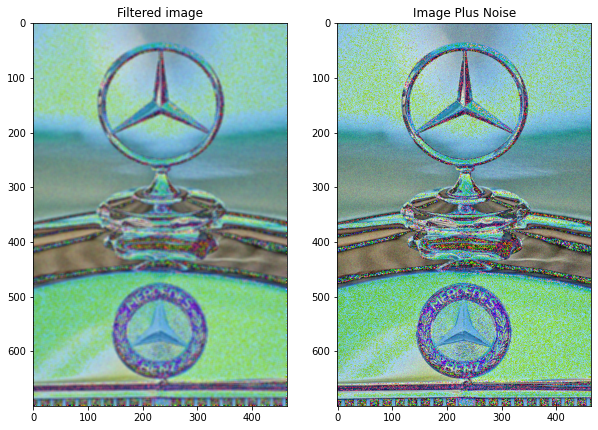

In [48]:
conc_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

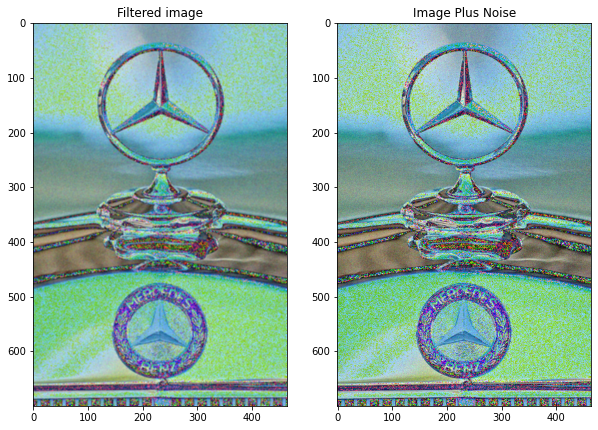

In [51]:
kernel = np.ones((3,3))/36
kernel_filter = ImageFilter.Kernel((3,3), kernel.flatten())
image_filtered = noisy_image.filter(kernel_filter)
conc_image(image_filtered, noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

# **Gaussian Blur**


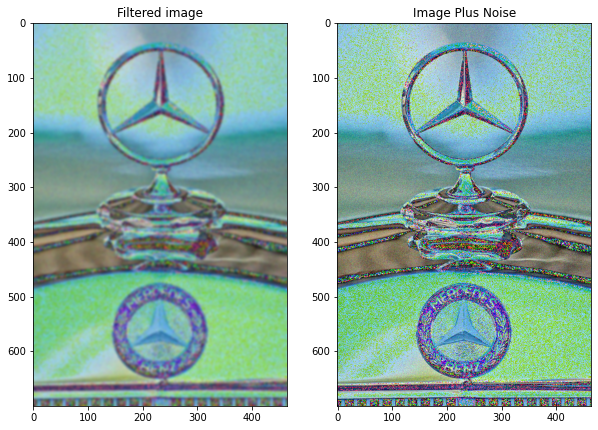

In [52]:
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur)
conc_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

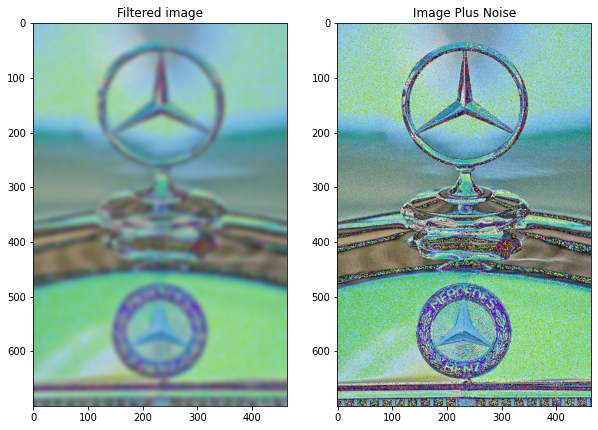

In [54]:
image_filtered = noisy_image.filter(ImageFilter.GaussianBlur(4))
conc_image(image_filtered , noisy_image,title_1="Filtered image",title_2="Image Plus Noise")

# **Image Sharpening** 

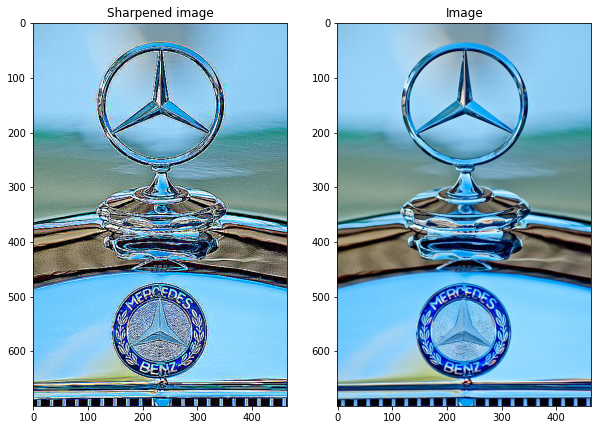

In [55]:
kernel = np.array([[-1,-1,-1], 
                   [-1, 9,-1],
                   [-1,-1,-1]])
kernel = ImageFilter.Kernel((3,3), kernel.flatten())
sharpened = image.filter(kernel)
conc_image(sharpened , image, title_1="Sharpened image",title_2="Image")

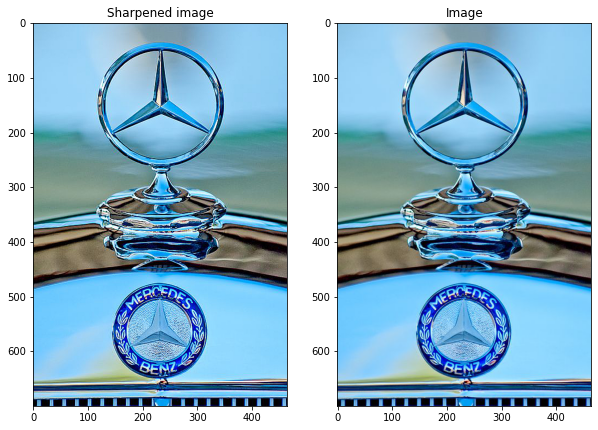

In [56]:
sharpened = image.filter(ImageFilter.SHARPEN)
conc_image(sharpened , image, title_1="Sharpened image",title_2="Image")

# **Edges**

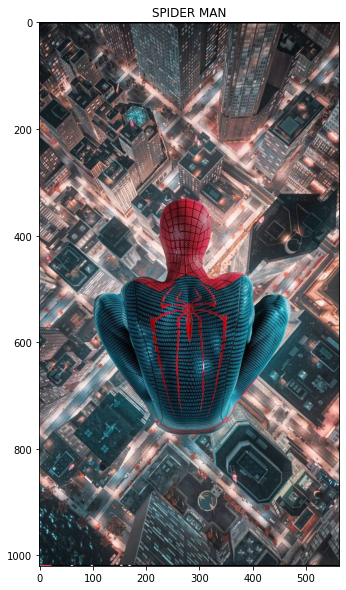

In [58]:
img_gray = Image.open('image3.png')
plt.figure(figsize=(10,10))
plt.title('SPIDER MAN')
plt.imshow(img_gray ,cmap='gray')

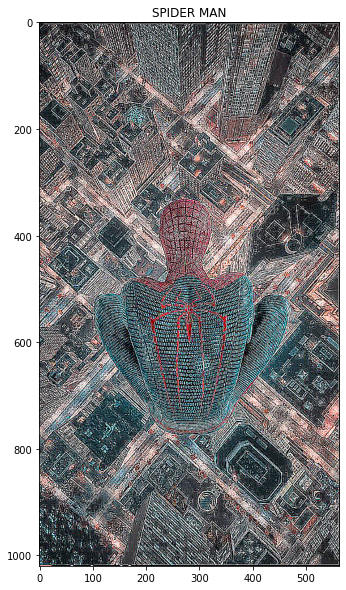

In [60]:
img_gray = img_gray.filter(ImageFilter.EDGE_ENHANCE)
plt.figure(figsize=(10,10))
plt.title('SPIDER MAN')
plt.imshow(img_gray ,cmap='gray')

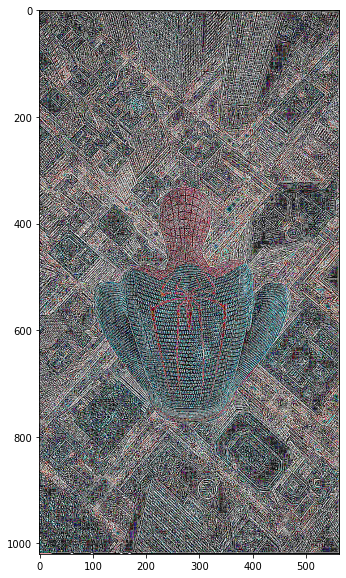

In [61]:
img_gray = img_gray.filter(ImageFilter.FIND_EDGES)
plt.figure(figsize=(10,10))
plt.imshow(img_gray ,cmap='gray')
plt.show()

# **MEDIAN**

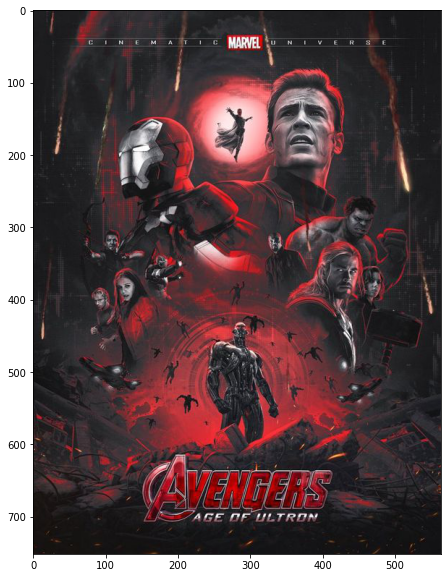

In [64]:
image = Image.open("image2.png")
plt.figure(figsize=(10,10))
plt.imshow(image,cmap="gray")

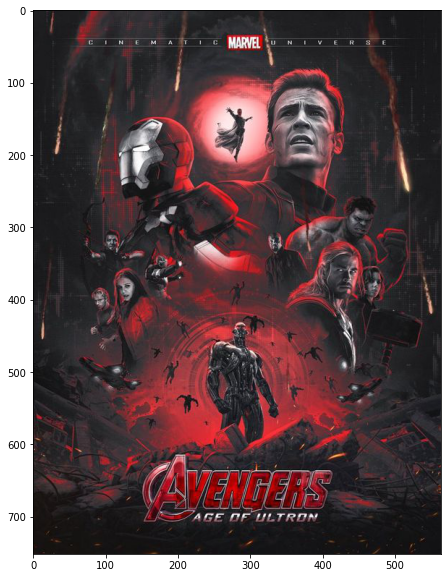

In [65]:
image1 = image.filter(ImageFilter.MedianFilter)
plt.figure(figsize=(10,10))
plt.imshow(image,cmap="gray")

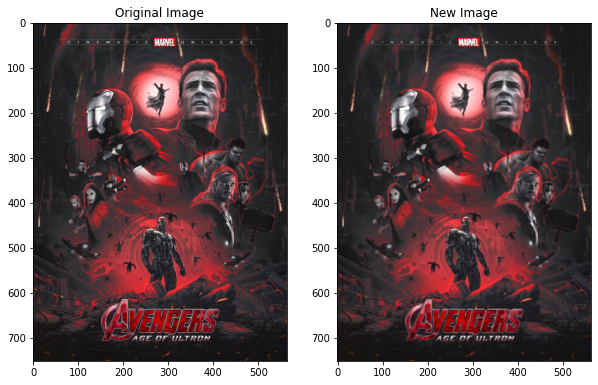

In [66]:
conc_image(image, image1)